# EDA

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='darkgrid')
import numpy as np
from sklearn.model_selection import train_test_split

### INITIAL EDA

For this section, we shall focus on the **seasonal_vaccine** target.

In [12]:
y = pd.read_csv('data/training_set_labels.csv').drop(['respondent_id', 
                                                      'h1n1_vaccine'], axis = 1)

In [13]:
X = pd.read_csv('data/training_set_features.csv')
X.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

We'll have a look at the column information.

In [15]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20030 entries, 25194 to 23654
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                20030 non-null  int64  
 1   h1n1_concern                 19963 non-null  float64
 2   h1n1_knowledge               19943 non-null  float64
 3   behavioral_antiviral_meds    19974 non-null  float64
 4   behavioral_avoidance         19873 non-null  float64
 5   behavioral_face_mask         20016 non-null  float64
 6   behavioral_wash_hands        19994 non-null  float64
 7   behavioral_large_gatherings  19960 non-null  float64
 8   behavioral_outside_home      19972 non-null  float64
 9   behavioral_touch_face        19932 non-null  float64
 10  doctor_recc_h1n1             18395 non-null  float64
 11  doctor_recc_seasonal         18395 non-null  float64
 12  chronic_med_condition        19313 non-null  float64
 13  child_under_

It would be a good idea to split the data into numerical and categorical data. <br> <br>
As the data has been largely preprepared for us, we shall just take the columns which are objects to be non_numeric and those which are float to be numeric.

In [17]:
numericals = []
non_numericals = []

for column in X_train.columns:
    if X_train[column].dtype == 'float64':
        numericals.append(column)
    if X_train[column].dtype == 'object':
        non_numericals.append(column)

We'll also drop **respondent_ID** as that would help predictions.

In [18]:
X_train.drop('respondent_id', axis = 1, inplace = True)

/Users/Abass/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


At initial glance, we may be tempted to drop **'hhs_geo_region', 'employment_industry', 'employment_occupation'** due to their randomized characters. However, we should check if these are unique for respondents or not.

In [19]:
for column in ['hhs_geo_region', 'employment_industry', 'employment_occupation']:
    print(X_train[column].value_counts())
    print('')

lzgpxyit    3188
fpwskwrf    2446
qufhixun    2342
kbazzjca    2174
oxchjgsf    2170
bhuqouqj    2105
mlyzmhmf    1660
lrircsnp    1573
atmpeygn    1522
dqpwygqj     850
Name: hhs_geo_region, dtype: int64

fcxhlnwr    1889
wxleyezf    1327
ldnlellj     935
pxcmvdjn     788
atmlpfrs     716
xicduogh     648
arjwrbjb     642
mfikgejo     460
vjjrobsf     392
rucpziij     391
xqicxuve     379
saaquncn     255
cfqqtusy     239
nduyfdeo     209
mcubkhph     200
wlfvacwt     155
dotnnunm     137
haxffmxo     117
msuufmds      94
phxvnwax      72
qnlwzans      11
Name: employment_industry, dtype: int64

xtkaffoo    1316
mxkfnird    1139
cmhcxjea     959
emcorrxb     942
xgwztkwe     813
hfxkjkmi     582
qxajmpny     414
xqwwgdyp     371
kldqjyjy     363
uqqtjvyb     337
tfqavkke     280
ukymxvdu     278
vlluhbov     263
ccgxvspp     262
oijqvulv     252
bxpfxfdn     251
haliazsg     227
rcertsgn     213
xzmlyyjv     190
dlvbwzss     172
hodpvpew     144
dcjcmpih     117
pvmttkik      71
Name:

We can see that they are categorical variables even though they are censored. So they shall be kept. <br>

We'll now look at **missing values**. This is specifically for our logistic regression models as they cannot use missing values.

In [109]:
#For our numerical features
X_train[numericals].isna().sum()

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
household_adults                 249
household_children               249
dtype: int64

We'll simply use the median values of each of these columns.

And now for the non_numericals.

In [21]:
X_train[non_numericals].isna().sum()

age_group                    0
education                 1040
race                         0
sex                          0
income_poverty            3269
marital_status            1038
rent_or_own               1512
employment_status         1081
hhs_geo_region               0
census_msa                   0
employment_industry       9974
employment_occupation    10074
dtype: int64

For these, we shall replace them with the modal values.

For our target variable, we should check if they are **imbalanced**.

In [20]:
y_train['seasonal_vaccine'].value_counts(normalize=True)

0    0.531103
1    0.468897
Name: seasonal_vaccine, dtype: float64

Thankfully the seasonal target is fairly balanced.

## VISUALISING DISTRIBUTIONS
It is a good idea to view the shapes of the distributions in our data.

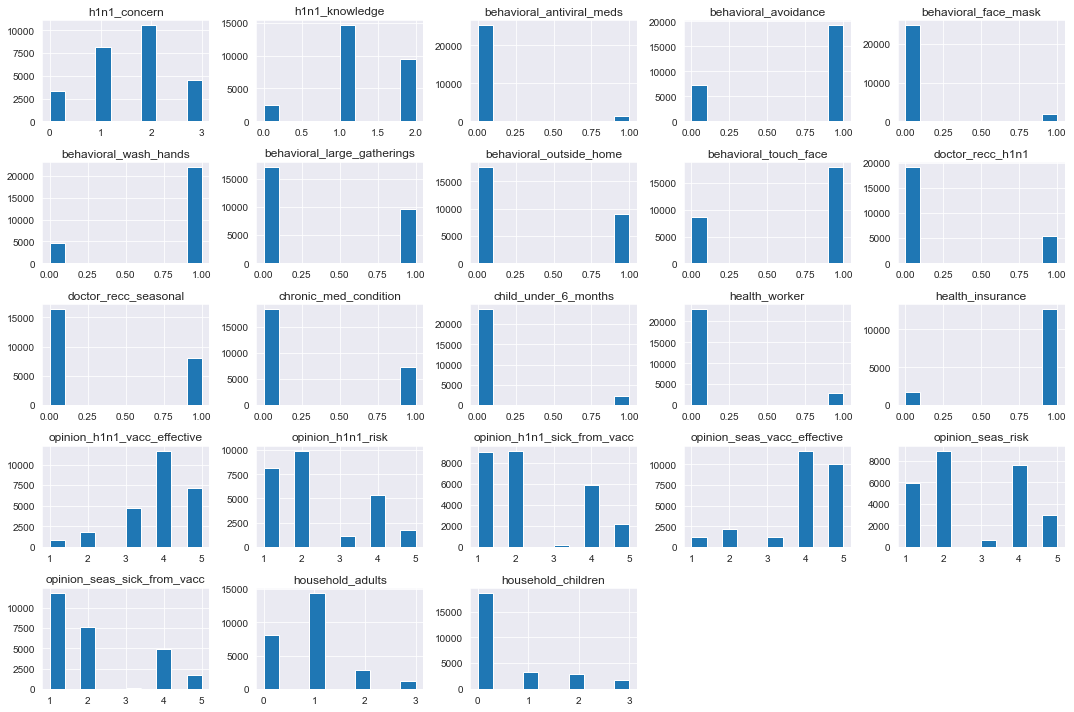

In [120]:
X_train.hist(figsize=(15,10))
plt.tight_layout()

This gives us an idea of what is going on with each individual feature. <br>
<br>
A further way to visualise the data would be to view how these features change with relation to the predictor.

/Users/Abass/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


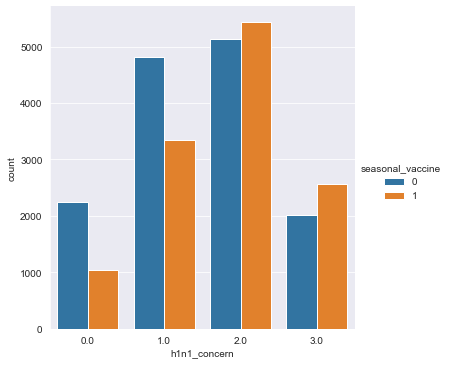

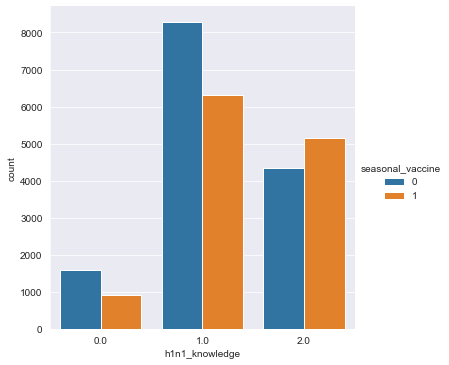

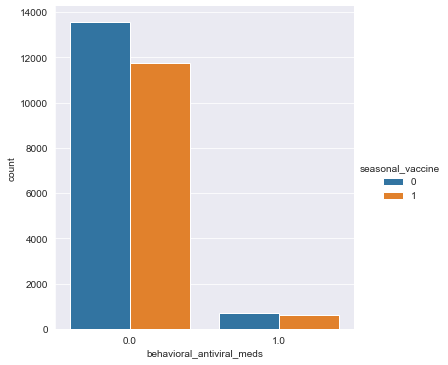

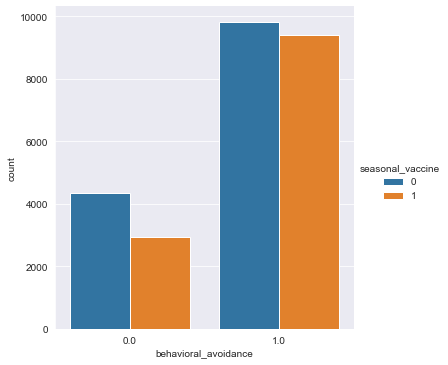

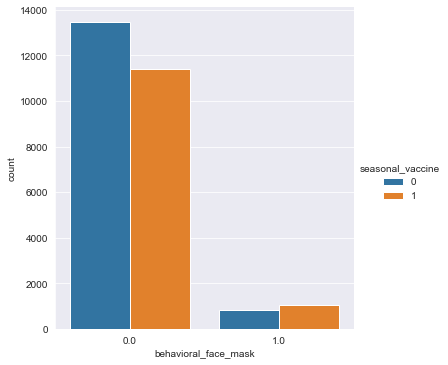

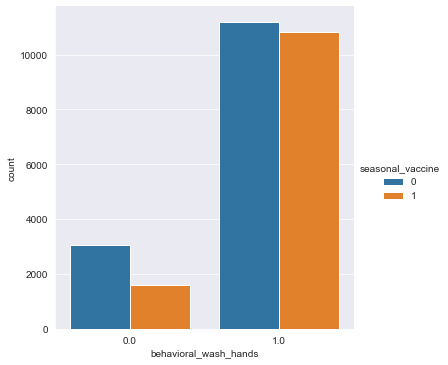

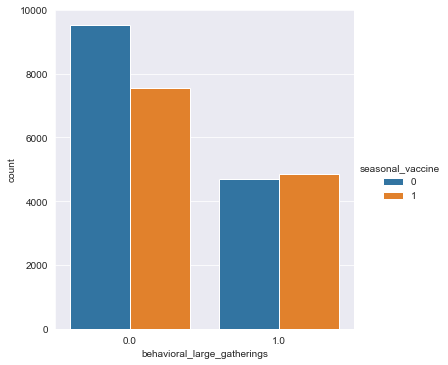

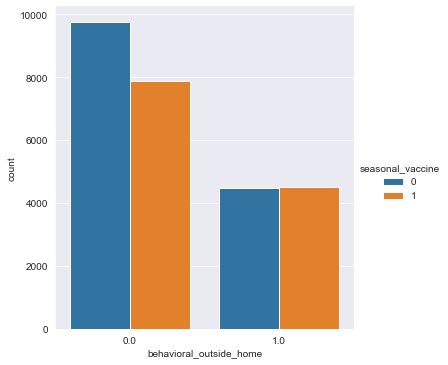

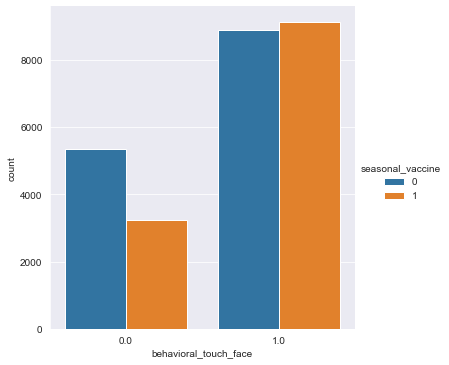

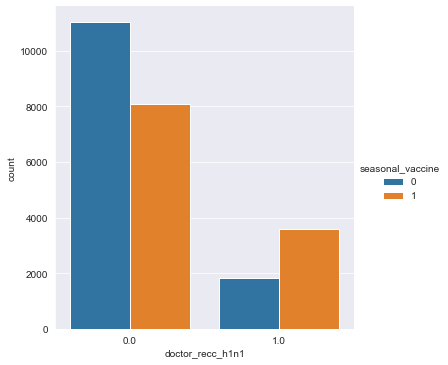

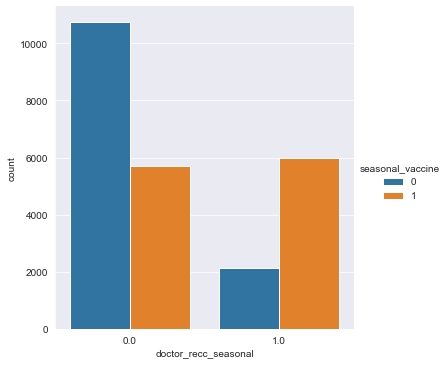

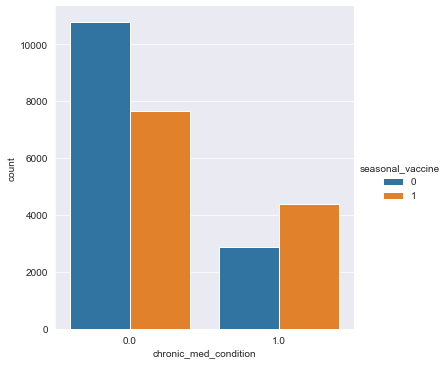

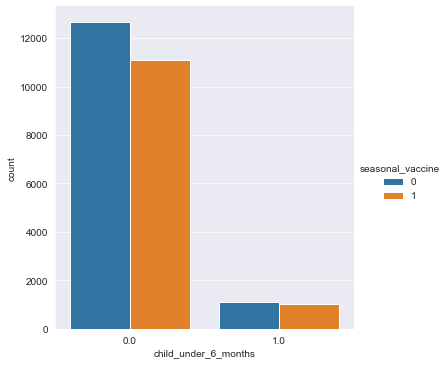

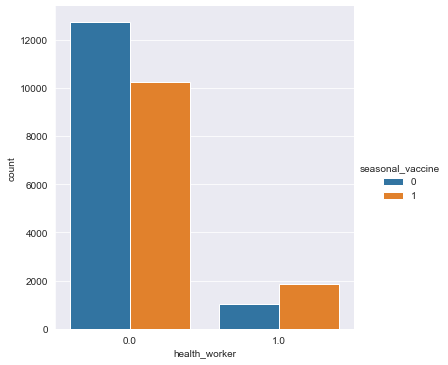

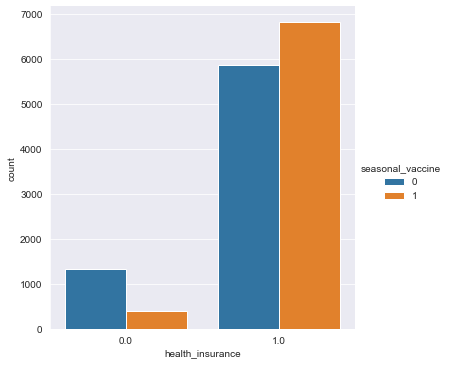

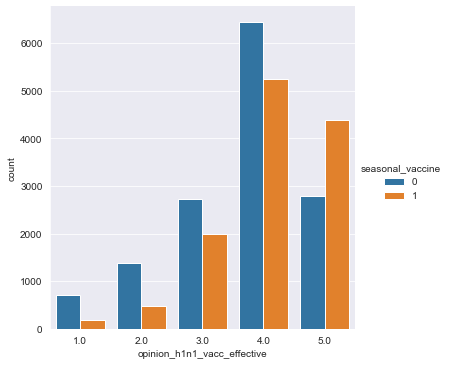

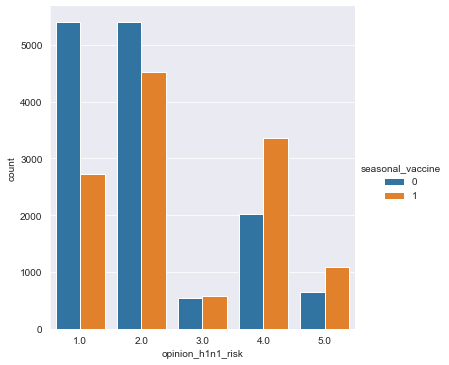

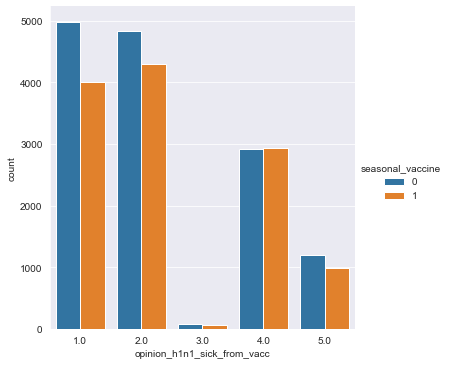

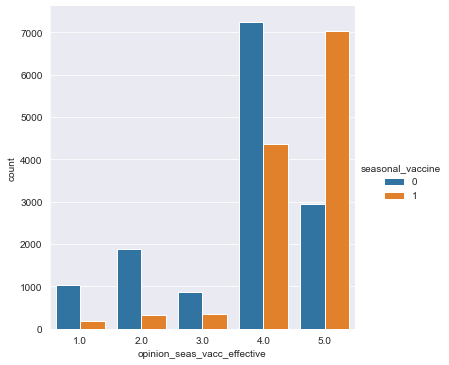

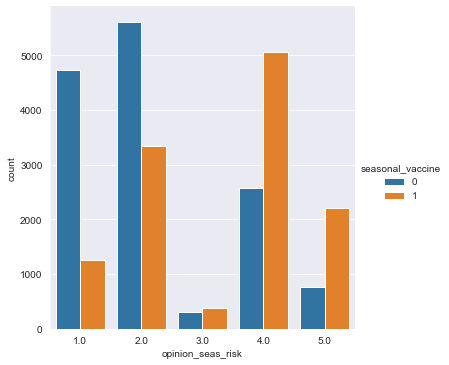

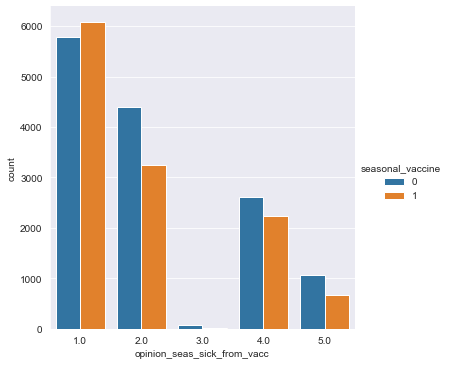

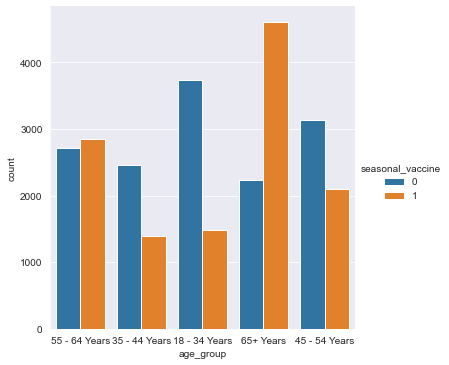

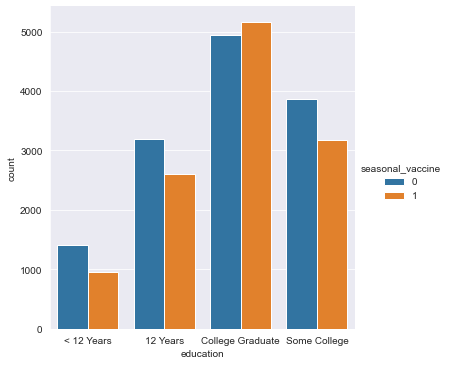

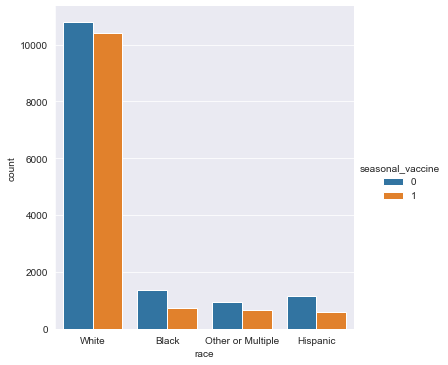

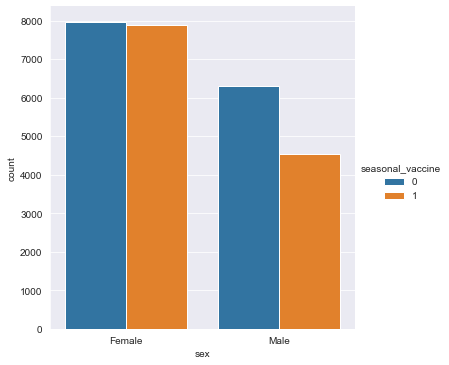

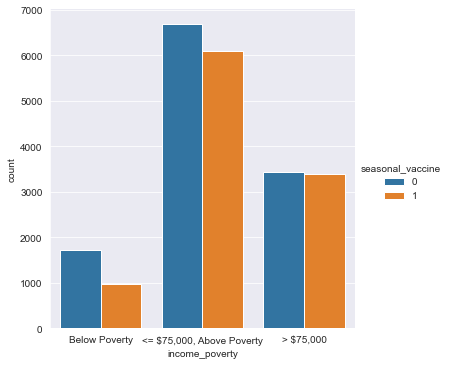

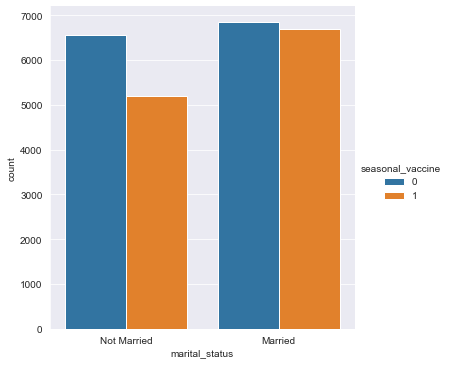

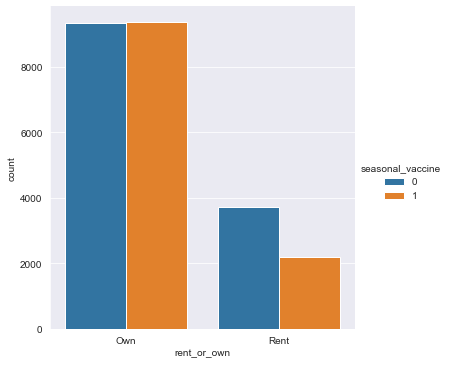

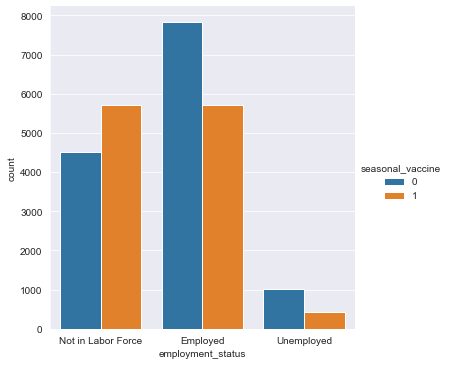

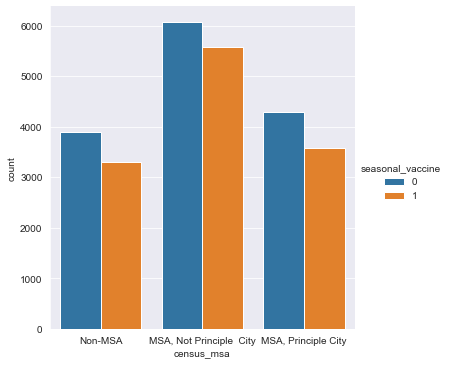

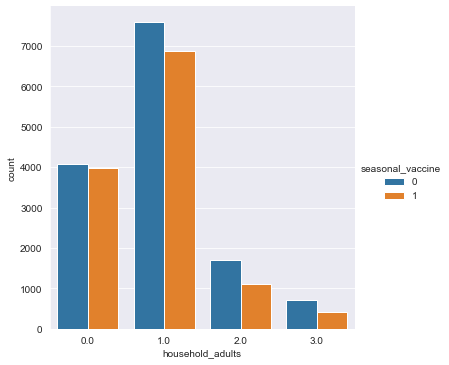

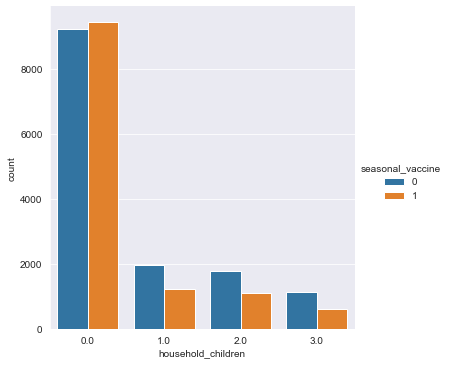

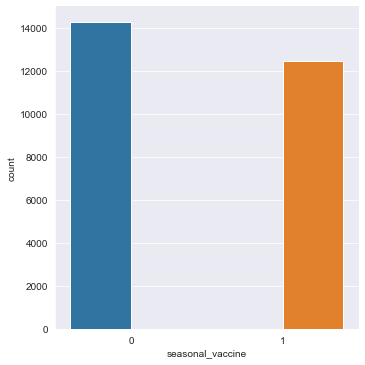

In [161]:
temp_dataframe = pd.concat([X_train, y_train], axis=1).drop(['employment_industry', 'hhs_geo_region', 'employment_occupation'], axis=1)

for column in temp_dataframe.columns:
    sns.catplot(x = column, 
                data = temp_dataframe,
                hue = 'seasonal_vaccine', 
                kind = 'count');